In [5]:
import numpy as np

def load_data(file_path):
    data = np.loadtxt(file_path)[:10, 4]
    return data

def calculate_speedup(time_serial, time_parallel):
    return time_serial / time_parallel

# List of parallel data file paths
file_paths = [
    "mcmc_parallel_5.dat", "mcmc_parallel_10.dat", "mcmc_parallel_15.dat",
    "mcmc_parallel_20.dat", "mcmc_parallel_25.dat", "mcmc_parallel_30.dat",
    "mcmc_parallel_35.dat", "mcmc_parallel_40.dat", "mcmc_parallel_45.dat",
    "mcmc_parallel_50.dat", "mcmc_parallel_55.dat", "mcmc_parallel_60.dat",
    "mcmc_parallel_65.dat", "mcmc_parallel_70.dat", "mcmc_parallel_75.dat",
    "mcmc_parallel_80.dat", "mcmc_parallel_85.dat", "mcmc_parallel_90.dat",
    "mcmc_parallel_95.dat", "mcmc_parallel_100.dat"
]

# Load serial data
time_serial = load_data("mcmc_serial.dat")

# Load parallel data and calculate speedup
speedup_data = []
for file_path in file_paths:
    time_parallel = load_data(file_path)
    speedup = calculate_speedup(time_serial, time_parallel)
    speedup_data.append(speedup)

# Stack the speedup data into a single array
speedup_weak_data = np.column_stack(speedup_data)

# Save the result to a file
np.savetxt("speedup_weak_data.dat", speedup_weak_data, fmt='%f', delimiter='\t',
           header=" ".join(f"speedup_{i*5}" for i in range(1, 21)))


In [7]:
import numpy as np

def load_data(file_path):
    return np.loadtxt(file_path)[:10, 4]

def calculate_speedup(time_serial, time_parallel, num_threads):
    return time_serial / (num_threads * time_parallel)

# List of parallel data file paths
file_paths = [
    "mcmc_parallel_5.dat", "mcmc_parallel_10.dat", "mcmc_parallel_15.dat",
    "mcmc_parallel_20.dat", "mcmc_parallel_25.dat", "mcmc_parallel_30.dat",
    "mcmc_parallel_35.dat", "mcmc_parallel_40.dat", "mcmc_parallel_45.dat",
    "mcmc_parallel_50.dat", "mcmc_parallel_55.dat", "mcmc_parallel_60.dat",
    "mcmc_parallel_65.dat", "mcmc_parallel_70.dat", "mcmc_parallel_75.dat",
    "mcmc_parallel_80.dat", "mcmc_parallel_85.dat", "mcmc_parallel_90.dat",
    "mcmc_parallel_95.dat", "mcmc_parallel_100.dat"
]

# Load serial data
time_serial = load_data("mcmc_serial.dat")

# Load parallel data and calculate speedup
speedup_data = []
for file_path in file_paths:
    num_threads = int(file_path.split("_")[2].split(".")[0])
    time_parallel = load_data(file_path)
    speedup = calculate_speedup(time_serial, time_parallel, num_threads)
    speedup_data.append(speedup)

# Stack the speedup data into a single array
speedup_strong_data = np.column_stack(speedup_data)

# Save the result to a file
np.savetxt("speedup_strong_data.dat", speedup_strong_data, fmt='%f', delimiter='\t',
           header=" ".join(f"speedup_{i*5}" for i in range(1, 21)))


In [20]:
import numpy as np

data_serial = np.loadtxt("mcmc_serial.dat")
data_10 = np.loadtxt("mcmc_parallel_10.dat")
data_20 = np.loadtxt("mcmc_parallel_20.dat")
data_30 = np.loadtxt("mcmc_parallel_30.dat")
data_40 = np.loadtxt("mcmc_parallel_40.dat")
data_50 = np.loadtxt("mcmc_parallel_50.dat")
data_60 = np.loadtxt("mcmc_parallel_60.dat")
data_70 = np.loadtxt("mcmc_parallel_70.dat")
data_80 = np.loadtxt("mcmc_parallel_80.dat")
data_90 = np.loadtxt("mcmc_parallel_90.dat")
data_100 = np.loadtxt("mcmc_parallel_100.dat")

time_serial = data_serial[:, 4]
time_10 = data_10[:, 4]
time_20 = data_20[:, 4]
time_30 = data_30[:, 4]
time_40 = data_40[:, 4]
time_50 = data_50[:, 4]
time_60 = data_60[:, 4]
time_70 = data_70[:, 4]
time_80 = data_80[:, 4]
time_90 = data_90[:, 4]
time_100 = data_100[:, 4]

speedup_10 = time_serial / (10 * time_10)  # Corrected formula for strong scaling efficiency
speedup_20 = time_serial / (20 * time_20)
speedup_30 = time_serial / (30 * time_30)
speedup_40 = time_serial / (40 * time_40)
speedup_50 = time_serial / (50 * time_50)
speedup_60 = time_serial / (60 * time_60)
speedup_70 = time_serial / (70 * time_70)
speedup_80 = time_serial / (80 * time_80)
speedup_90 = time_serial / (90 * time_90)
speedup_100 = time_serial / (100 * time_100)

speedup_strong_data = np.column_stack((speedup_10, speedup_20, speedup_30, speedup_40, speedup_50,
                                       speedup_60, speedup_70, speedup_80, speedup_90, speedup_100))

np.savetxt("speedup_strong_data.dat", speedup_strong_data, fmt='%f', delimiter='\t',
           header="speedup_10 speedup_20 speedup_30 speedup_40 speedup_50 speedup_60 speedup_70 speedup_80 speedup_90 speedup_100")


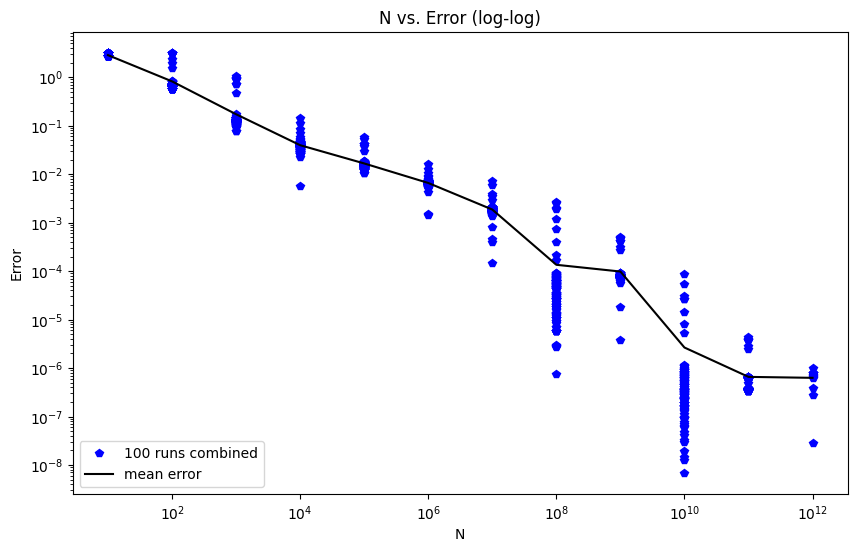

In [56]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("multiple_runs.dat")

N_i = data[:, 1]
error = data[:, 3]

unique_N = []
mean_error = []

for N in np.unique(N_i):
    error_N = error[N_i == N]
    mean_error_N = np.mean(error_N) #calculates mean error for each value of 'N'
    unique_N.append(N)
    mean_error.append(mean_error_N)

unique_N = np.array(unique_N)
mean_error = np.array(mean_error)
plt.figure(figsize=(10, 6))

plt.loglog(data[:, 1], data[:, 3], 'p', label='100 runs combined',color='blue')
plt.loglog(unique_N, mean_error, label='mean error', color='black')

plt.legend(loc=3)
plt.xlabel("N")
plt.ylabel("Error")
plt.title('N vs. Error (log-log)')

plt.savefig("N_vs_E_avg_mcmc", bbox_inches='tight')

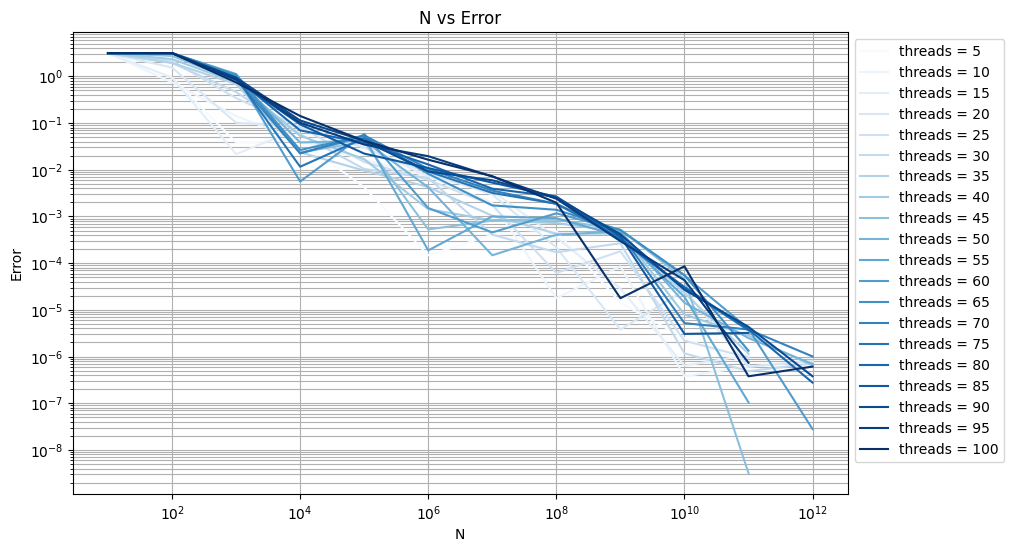

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgba

data_list = [np.loadtxt(f"mcmc_parallel_{i * 5}.dat") for i in range(1, 21)]

blue_gradient = plt.cm.Blues(np.linspace(0, 1, 20))
plt.figure(figsize=(10, 6))

for i, data in enumerate(data_list):
    plt.loglog(data[:, 1], data[:, 3], label=f'threads = {(i+1)*5}', marker='', linestyle='-', color=blue_gradient[i])

plt.xlabel("N")
plt.ylabel("Error")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.title("N vs Error")
plt.grid(True, which='both', axis='both')
plt.savefig("N_vs_E_mcmc", bbox_inches='tight')

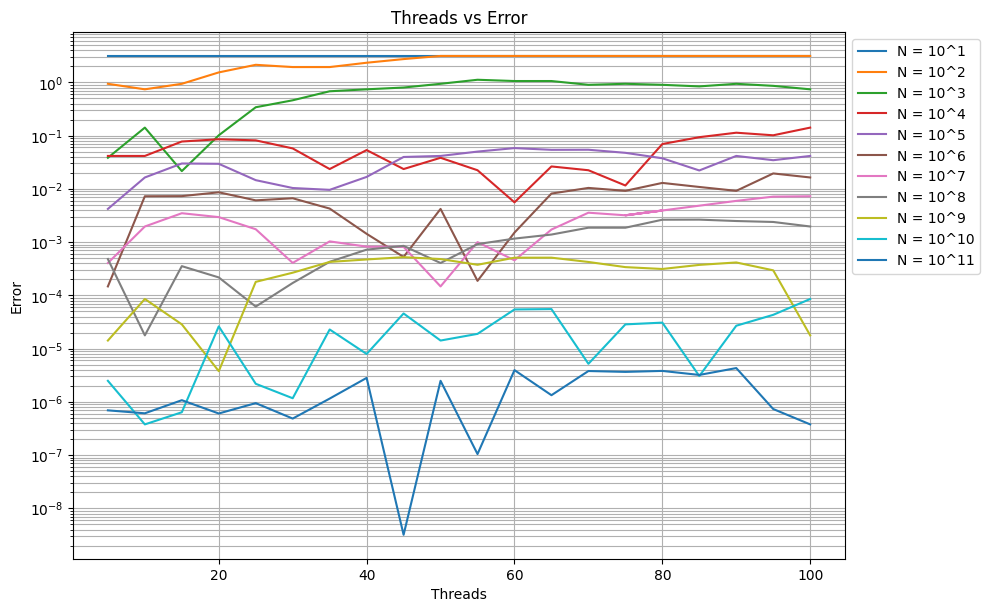

In [49]:
import numpy as np
from matplotlib import pyplot as plt

# Generate file names using a loop
file_names = [f"mcmc_parallel_N_{10**i}.dat" for i in range(1, 12)]

# Load data into a list
data_list = [np.loadtxt(file_name) for file_name in file_names]

plt.figure(figsize=(10, 6))

# Gradient of red colors
red_gradient = plt.cm.Reds(np.linspace(0, 1, 20))

# Plotting the data with log scale on y-axis
for i, data in enumerate(data_list):
    plt.plot(data[:,0], data[:, 3], label=f'N = 10^{i + 1}', marker='', linestyle='-')

# Additional customization
plt.xlabel("Threads")
plt.ylabel("Error")
plt.yscale('log')  # Set y-axis to log scale
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True, which='both', axis='both')
plt.tight_layout()
plt.title("Threads vs Error")
plt.savefig("threads_vs_E_mcmc", bbox_inches='tight')

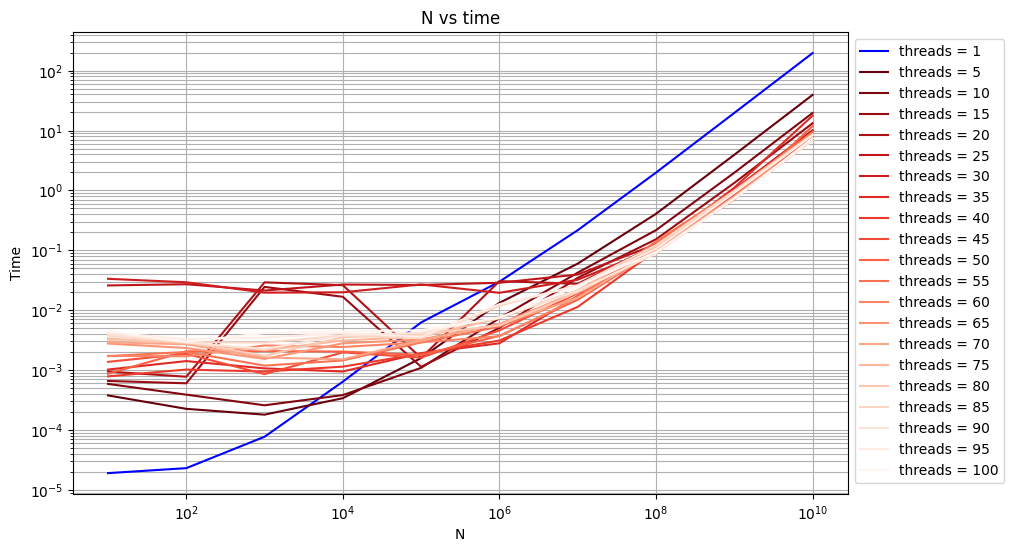

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgba


data_serial = np.loadtxt("mcmc_serial.dat")
data_5 = np.loadtxt("mcmc_parallel_5.dat")
data_10 = np.loadtxt("mcmc_parallel_10.dat")
data_15 = np.loadtxt("mcmc_parallel_15.dat")
data_20 = np.loadtxt("mcmc_parallel_20.dat")
data_25 = np.loadtxt("mcmc_parallel_25.dat")
data_30 = np.loadtxt("mcmc_parallel_30.dat")
data_35 = np.loadtxt("mcmc_parallel_35.dat")
data_40 = np.loadtxt("mcmc_parallel_40.dat")
data_45 = np.loadtxt("mcmc_parallel_45.dat")
data_50 = np.loadtxt("mcmc_parallel_50.dat")
data_55 = np.loadtxt("mcmc_parallel_55.dat")
data_60 = np.loadtxt("mcmc_parallel_60.dat")
data_65 = np.loadtxt("mcmc_parallel_65.dat")
data_70 = np.loadtxt("mcmc_parallel_70.dat")
data_75 = np.loadtxt("mcmc_parallel_75.dat")
data_80 = np.loadtxt("mcmc_parallel_80.dat")
data_85 = np.loadtxt("mcmc_parallel_85.dat")
data_90 = np.loadtxt("mcmc_parallel_90.dat")
data_95 = np.loadtxt("mcmc_parallel_95.dat")
data_100 = np.loadtxt("mcmc_parallel_100.dat")


thread_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data_threads = np.array(thread_values) 
plt.figure(figsize=(10, 6))

# Gradient of red colors
red_gradient = plt.cm.Reds(np.linspace(0, 1, 20))

plt.loglog(data_serial[:10,1], data_serial[:10, 4], label=f'threads = 1', marker='', linestyle='-', color='b')
plt.loglog(data_serial[:10,1], data_5[:10, 4], label=f'threads = 5', marker='', linestyle='-', color=red_gradient[19])
plt.loglog(data_serial[:10,1], data_10[:10, 4], label=f'threads = 10', marker='', linestyle='-', color=red_gradient[18])
plt.loglog(data_serial[:10,1], data_15[:10, 4], label=f'threads = 15', marker='', linestyle='-', color=red_gradient[17])
plt.loglog(data_serial[:10,1], data_20[:10, 4], label=f'threads = 20', marker='', linestyle='-', color=red_gradient[16])
plt.loglog(data_serial[:10,1], data_25[:10, 4], label=f'threads = 25', marker='', linestyle='-', color=red_gradient[15])
plt.loglog(data_serial[:10,1], data_30[:10, 4], label=f'threads = 30', marker='', linestyle='-', color=red_gradient[14])
plt.loglog(data_serial[:10,1], data_35[:10, 4], label=f'threads = 35', marker='', linestyle='-', color=red_gradient[13])
plt.loglog(data_serial[:10,1], data_40[:10, 4], label=f'threads = 40', marker='', linestyle='-', color=red_gradient[12])
plt.loglog(data_serial[:10,1], data_45[:10, 4], label=f'threads = 45', marker='', linestyle='-', color=red_gradient[11])
plt.loglog(data_serial[:10,1], data_50[:10, 4], label=f'threads = 50', marker='', linestyle='-', color=red_gradient[10])
plt.loglog(data_serial[:10,1], data_55[:10, 4], label=f'threads = 55', marker='', linestyle='-', color=red_gradient[9])
plt.loglog(data_serial[:10,1], data_60[:10, 4], label=f'threads = 60', marker='', linestyle='-', color=red_gradient[8])
plt.loglog(data_serial[:10,1], data_65[:10, 4], label=f'threads = 65', marker='', linestyle='-', color=red_gradient[7])
plt.loglog(data_serial[:10,1], data_70[:10, 4], label=f'threads = 70', marker='', linestyle='-', color=red_gradient[6])
plt.loglog(data_serial[:10,1], data_75[:10, 4], label=f'threads = 75', marker='', linestyle='-', color=red_gradient[5])
plt.loglog(data_serial[:10,1], data_80[:10, 4], label=f'threads = 80', marker='', linestyle='-', color=red_gradient[4])
plt.loglog(data_serial[:10,1], data_85[:10, 4], label=f'threads = 85', marker='', linestyle='-', color=red_gradient[3])
plt.loglog(data_serial[:10,1], data_90[:10, 4], label=f'threads = 90', marker='', linestyle='-', color=red_gradient[2])
plt.loglog(data_serial[:10,1], data_95[:10, 4], label=f'threads = 95', marker='', linestyle='-', color=red_gradient[1])
plt.loglog(data_serial[:10,1], data_100[:10, 4], label=f'threads = 100', marker='', linestyle='-', color=red_gradient[0])

plt.xlabel("N")
plt.ylabel("Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True, which='both', axis='both')
plt.title("N vs time")
plt.savefig("N_vs_time", bbox_inches='tight')

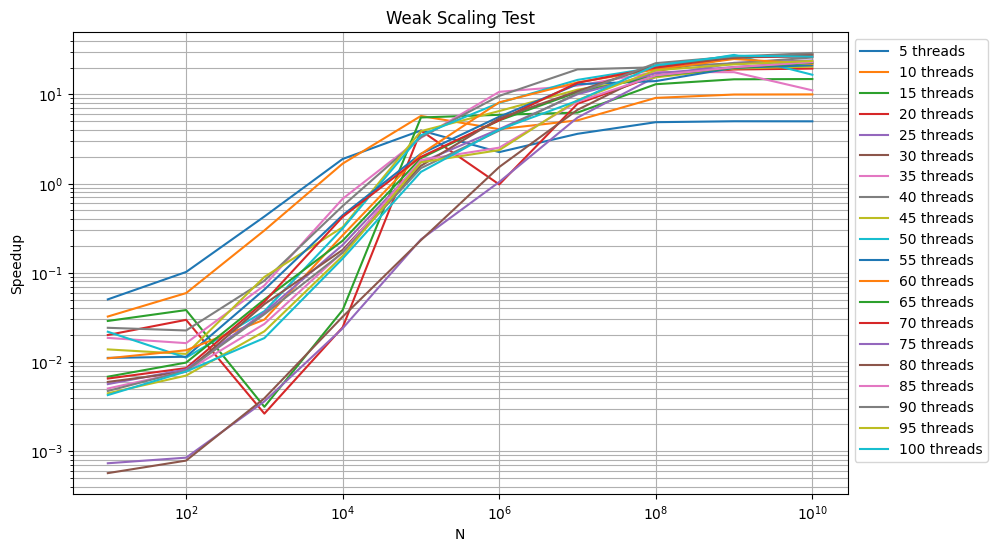

In [59]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt("speedup_weak_data.dat")
data_serial = np.loadtxt("mcmc_serial.dat")

plt.figure(figsize=(10, 6))

plt.loglog(data_serial[:10,1], data[:,0], label='5 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,1], label='10 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,2], label='15 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,3], label='20 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,4], label='25 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,5], label='30 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,6], label='35 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,7], label='40 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,8], label='45 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,9], label='50 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,10], label='55 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,11], label='60 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,12], label='65 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,13], label='70 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,14], label='75 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,15], label='80 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,16], label='85 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,17], label='90 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,18], label='95 threads', marker='', linestyle='-')
plt.loglog(data_serial[:10,1], data[:,19], label='100 threads', marker='', linestyle='-')

plt.xlabel("N")
plt.ylabel("Speedup")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True, which='both', axis='both')
plt.title("Weak Scaling Test")
plt.savefig("weak_scaling_test", bbox_inches='tight')

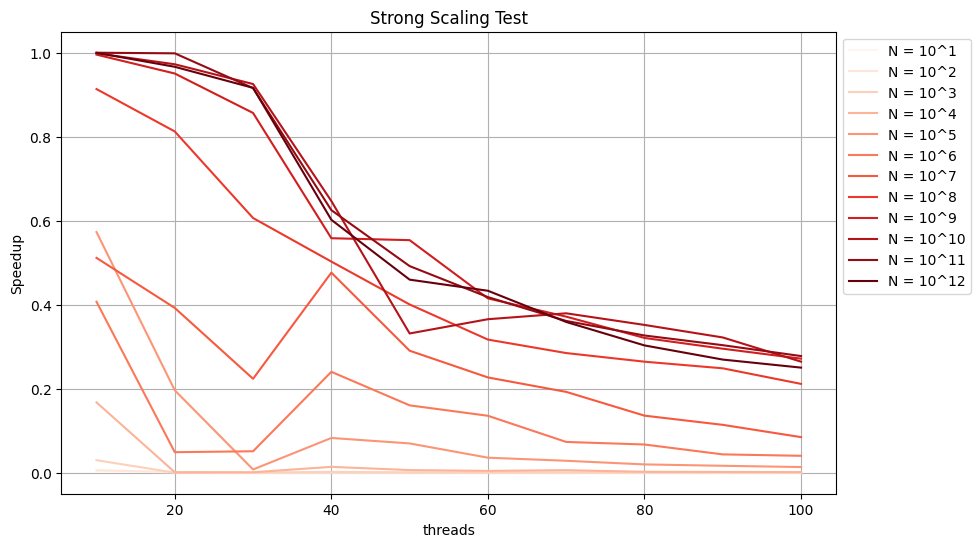

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgba

data_speedup = np.loadtxt("speedup_strong_data.dat")

#thread_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
thread_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data_threads = np.array(thread_values) 
plt.figure(figsize=(10, 6))

# Gradient of red colors
red_gradient = plt.cm.Reds(np.linspace(0, 1, 12))

for i in range(12):
    plt.plot(data_threads, data_speedup[i, :], label=f'N = 10^{i + 1}', marker='', linestyle='-', color=red_gradient[i])

#plt.plot(data_threads, data_speedup[10, :], label=f'N = 10^{}', marker='', linestyle='-', color=red_gradient[i])

plt.xlabel("threads")
plt.ylabel("Speedup")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True, which='both', axis='both')
plt.title("Strong Scaling Test")
plt.savefig("strong_scaling_test", bbox_inches='tight')